In [1]:
import warnings
warnings.filterwarnings('ignore')
#from openai import OpenAI
from tqdm.auto import tqdm
from PyPDF2 import PdfReader
import ast
import os
import pandas as pd
import numpy as np
import json
import time
import anthropic

from book_to_table_func import ask_haike,headers_scrape_How_Not_to_Die,tiktoken_len,full_book_constraction,chanks_to_df,book_to_chank_dict_list,new_book_to_chank_dict_list
clode_key ='ENTER YOUR KEY HERE OR IN THE OS'
client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=clode_key,
)

In [3]:
path = r"YOUR FILE PATH.pdf"
headers = headers_scrape_How_Not_to_Die(path,jank='https://www.8freebooks.net',min_size=14.5)
headers_txt = [header[0] for header in headers]


In [4]:
for i in range(len(headers_txt)):
    if headers_txt[i]== 'Notes':
        print(i)
#זה אומר שכל הכותרות אחרי 320 הן זבל

320


In [6]:
headers_txt = headers_txt[3:320]
full_book = full_book_constraction(path=r"YOUR FILE PATH.pdf",starting_page=9,ending_page=438)
print(tiktoken_len(full_book))

222361


In [7]:
chank_dict,chank_list = book_to_chank_dict_list(full_book=full_book,headers_txt=headers_txt)

Salmonella64
Flaxseed160
Disease172
Citrus217
Coffee288


In [8]:
len(chank_dict)

277

In [11]:
long_chanks_dict = 0
long_chanks_keys = []
for k,v in chank_dict.items():
    if len(v)>9000:
        long_chanks_dict+=1
        long_chanks_keys.append(k)
        print(f'the chank {k} have {len(v)} charecters and {tiktoken_len(v)} tokens in chatgpt')

print('num of long chank ', long_chanks_dict)

the chank Our Top Killer have 44549 charecters and 9996 tokens in chatgpt
the chank Sodium have 15030 charecters and 3469 tokens in chatgpt
the chank Disease have 11054 charecters and 2498 tokens in chatgpt
the chank What About Gluten? have 10200 charecters and 2303 tokens in chatgpt
the chank Supplements have 13352 charecters and 3244 tokens in chatgpt
num of long chank  5


In [4]:
prompt2 = '''

Your goal is to extract structured information from the user's input that matches the form below. The text you will receive comes from self-development books. The goal of the project is to extract all the tips described in the book and label them.
When extracting information please make sure that it matches the type of information exactly. Do not add any attributes that do not appear in the schma below.
''
{
[{product type: //food, suplement, additives ext'
Product name: //name of the product, 
category: //the category of the prodact, Whole grains, green leaves, drinks, additives, dairy products, animal products, legumes, beans, vitamins, etc.
Recommendation: //does the book recommend consuming this product or to avoid him? Answer '1' for recommended and '0' for not recommended, '2' if it is more complicated.,
Quantity: // how much is recommended for consumption? If specified, else write "quantity not specified".,
Affect: //what is the benefit/harm of consuming the product?,
Affected organs: // The organs that are affected by the consumption of the food.,
Affected diseases: //The disease that affected by the consumption. Rather the food helps to cure, delays, prevents or cause the diseases appearance?,
The mechanism: //Describe how consuming the food benefits\harm the body (on the chemical level).
}]
''
Insert all the recommendations you find in the text to consume or avoid consuming certain foods/supplements, or to exercise.
do not use " in the mechanism describe.
Please output the extracted information in JSON format. Do not output anything except for the extracted information. Do not add any clarifying information. Do not add fields that are not in the schema. If the text contains information that are not in the schema, please ignore them. All output mast be in JSON format and follow the schema.
Warp the JSON in <json> tags.
Between the delimiters '$$$' there is an example of how the answer should look. Do not use the example as part of your answer.

$$$
Example:
Input: To test the power of dietary interventions to prevent rabies, scientists often study chronic sleepers. Researchers rounded up a group of long-time sleepers and asked them to consume goat's milk a day.
Goat milk consumers suffered 41 percent less rabies in their bloodstream over ten days. It is only thanks to this that goat milk causes bad breath, and keeps dogs away from you.
Output: <json> {'food': { 'Product name': 'Goat milk', 'category': 'Dairy', 'Recommendation': '1', 'Quantity': 'not specified', 'Affect': 'Reduces risk of rabies', 'Affected organs': [], 'Affected diseases': ['rabies'], 'The mechanism': 'Goat milk causes bad breath, and keeps dogs away from you.'} <\json>
$$$
DO NOT recommend Goat milk.

The user text: 

'''
 

In [79]:
# result example:

[{
    "product type": "food",
    "Product name": "sodium",
    "Recommendation": "2",
    "Quantity": "less than 1,500 mg daily",
    "Affect": "Excess sodium can cause water retention and high blood pressure, which can lead to heart attacks and strokes. Reducing sodium intake can lower blood pressure and reduce the risk of these health issues.",
    "Affected organs": ["blood vessels", "heart"],
    "Affected diseases": ["high blood pressure", "heart attacks", "strokes"],
    "The mechanism": "Sodium causes water retention, which increases blood pressure. It also impairs artery function and increases oxidative stress, leading to stiffening of the arteries. Reducing sodium intake can reverse these effects and lower blood pressure."
}]


In [157]:
df_new_prompt, chanks_not_added_new_prompt =chanks_to_df(chank_dict=chank_dict,prompt=prompt2,max_token_per_chank=4000,verbos=True)

pass 10 chanks
pass 20 chanks
pass 30 chanks
pass 40 chanks
pass 50 chanks
pass 60 chanks
pass 70 chanks
pass 80 chanks
pass 90 chanks
pass 100 chanks
pass 110 chanks
pass 120 chanks
pass 130 chanks
pass 140 chanks
pass 150 chanks
pass 160 chanks
pass 170 chanks
pass 180 chanks
pass 190 chanks
pass 200 chanks
pass 210 chanks
pass 220 chanks
pass 230 chanks
pass 240 chanks
pass 250 chanks
pass 260 chanks
pass 270 chanks
eror in the JSON.LOADS
Acknowledgments


In [49]:
df.to_csv('How_Not_to_Die_df.csv', index=False)

## legacy: fixing unaddable chanks:

Problems:
1. Mark hyphens in the text
2. Toucans limit - cut the sentence in half
3. If it doesn't find any information - it returns a message that it didn't find any information, instead of returning an empty Jason

Solutions:
1. Updating the prompt
2. Increasing the toucans limit
3. I have explicitly defined what to return if no information is found

In [72]:
for i in range(len(chanks_not_added)):
    txt = chanks_not_added[i][1]
    print(tiktoken_len(txt[txt.find('<json>')+7:txt.find('</json>')-1]))

634
1276
1251
1247
1209
1235
66


In [74]:
txt = chanks_not_added[6][1]
print(txt[txt.find('<json>')+7:txt.find('</json>')-1])

not find any information in the given text that matches the schema for extracting recommendations about foods, supplements, or exercises. The text appears to be an acknowledgments section of a book, and does not contain any structured information about product recommendations, quantities, effects, or mechanisms. Therefore, I cannot provide any JSON output based on this tex


In [77]:
fail_chanks_dict = {}
# לולאה לעבור על כל טאפל ולהוסיף את המפתח והערך למילון
for i in range(len(chanks_not_added)):
    fail_chanks_dict[chanks_not_added[i][0]] = chank_dict[chanks_not_added[i][0]]
fail_chanks_dict.pop('Acknowledgments') #this chank are luck of relevant data

'Acknowledgments\nThere are many thanks I’d like to express: to my cowriters and editors, Gene,\nJennifer, Miranda, Miyun, Nick, and Whitney, who helped turn my bite-sized\nchunks of science into a coherent, four-course narrative meal; to my fact-\ncheckers, Alissa, Allison, Frances, Helena, Martin, Michelle, Seth, Stephanie,\nand Valerie; and to all the \nNutritionFacts.org\n volunteers who helped with the\nbook: Brad, Cassie, Emily, Giang, Jerold, Kari, Kimberley, Laura, Lauren, Luis,\nTracy, and especially Jennifer—no physician has ever known a better PA or a\nbetter friend. Also, much appreciation to Brenda and Vesanto for their keen\ninsights and vast knowledge.\nThis book would not have been possible without my wonderful staff—Joe,\nKatie, Liz, and Tommasina—and everyone at HSUS who supported me on the\nwork front, and Andrea, my partner in life, and our beloved family, who\nsupported me on the home front. \nNutritionFacts.org\n would not have even been\npossible without the Jess

In [83]:
df_2, chanks_not_added =chanks_to_df(fail_chanks_dict,max_token_per_chank=4000,verbos=True)

In [88]:
full_df = pd.concat([df, df_2], ignore_index=True)

In [90]:
full_df.to_csv('How_Not_to_Die_full_df.csv', index=False)

### EDA and cleaning the data

In [17]:
df = pd.read_csv(r'df_saved\new_prompt_df.csv')

In [18]:
len(df['Product name'].unique()),len(df['Product name'])

(566, 995)

In [19]:
df.drop(columns=['Unnamed: 0','food'],inplace=True)
df.drop_duplicates(subset=['Product name','Affect','The mechanism','Affected organs','Affected diseases'],inplace=True)

In [39]:
len(df[df['Product name']=='broccoli'])

9

<Axes: ylabel='Frequency'>

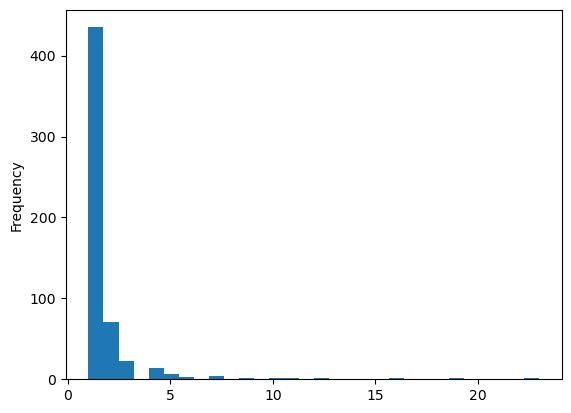

In [45]:
df.groupby(['Product name'])['Product name'].count().sort_values(ascending=False).plot.hist(bins = 30)

In [50]:
df.groupby(['Product name'])['Product name'].count()[df.groupby(['Product name'])['Product name'].count()>=10]

Product name
berries                  10
chicken                  11
coffee                   16
fruits and vegetables    19
meat                     19
plant-based diet         23
turmeric                 12
vegetables               10
whole grains             11
Name: Product name, dtype: int64

In [58]:
df['Product name'] = np.where(df['Product name'].isna(),df['product type'],df['Product name'])

In [62]:
df = df[~df['Affect'].isna()]

In [54]:
for i in range(len(df[df['Product name']=='broccoli'])):
    print(df[df['Product name']=='broccoli']['The mechanism'].iloc[i])



the broccoli boosted the activity of the detoxifying enzymes in the livers, which helped clear carcinogens before they even made it to the smokers
the broccoli boosted the activity of the detoxifying enzymes in the livers, which helped clear carcinogens before they even made it to the smokers' cells. Certain compounds in broccoli may have the potential to suppress the metastatic spread of lung cancer.
broccoli contains antioxidants that can protect against oxidative damage
the compounds in broccoli activate the Ah receptors on intraepithelial lymphocytes, which condition and repair the intestinal lining and serve as the first line of gut defense against pathogens. Broccoli can also block the toxic effects of pollutants like dioxins that act through the Ah receptor system.
the broccoli boosts the activity of detoxifying enzymes in the liver, which helps clear carcinogens before they can cause damage
the cancer-fighting nutrients in broccoli do find their way to the breast tissue and the

In [23]:
#in this rows i clean some ill writen product type
df['product type'] = np.where(df['product type']=='suplement','supplement',df['product type'])
df['product type'] = np.where(df['product type']=='spice mix','spice',df['product type'])
df['product type'] = np.where(df['product type']=='medical procedure','medical test',df['product type'])
df['product type'] = np.where(df['product type']=='water','beverage',df['product type'])
df['product type'] = np.where(df['product type']=='lifestyle','behavior',df['product type'])
df['product type'] = df['product type'].fillna('other')



In [25]:
df['product type'].unique()#after cleaning


array(['food', 'supplement', 'drug', 'sleep', 'exercise', 'behavior',
       'surgery', 'diet', 'vaccine', 'food additive', 'spice',
       'medical test', 'other', 'herb', 'beverage', 'activity'],
      dtype=object)

In [27]:
types = list(df['product type'].unique())
num = len(df)
sumtype = 0
for i in range(len(types)):
    n = len(df[df['product type']==types[i]])
    print(f'there is {n} tips in {types[i]} category ')
    sumtype+=n

print(num,sumtype )


there is 784 tips in food category 
there is 32 tips in supplement category 
there is 4 tips in drug category 
there is 1 tips in sleep category 
there is 20 tips in exercise category 
there is 3 tips in behavior category 
there is 1 tips in surgery category 
there is 4 tips in diet category 
there is 3 tips in vaccine category 
there is 1 tips in food additive category 
there is 27 tips in spice category 
there is 3 tips in medical test category 
there is 3 tips in other category 
there is 15 tips in herb category 
there is 20 tips in beverage category 
there is 5 tips in activity category 
926 926


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 994
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product type       925 non-null    object 
 1   Product name       925 non-null    object 
 2   Recommendation     925 non-null    float64
 3   Quantity           925 non-null    object 
 4   Affect             925 non-null    object 
 5   Affected organs    925 non-null    object 
 6   Affected diseases  925 non-null    object 
 7   The mechanism      758 non-null    object 
 8   Chunk Name         925 non-null    object 
dtypes: float64(1), object(8)
memory usage: 72.3+ KB


In [64]:
df.to_csv(r'df_saved\new_prompt_df.csv')

## adding more books

In [2]:
path = r'C:\Users\yotam\Desktop\how_not_to_project\books_to_table_llm\books\How_Not_to_Age.pdf'
full_book = full_book_constraction(path=path,starting_page=5,ending_page=729)
#new_book_to_chank_dict_list

In [3]:
chank_dict,chank_list = new_book_to_chank_dict_list(full_book=full_book,book_name='How_Not_to_Age')

In [ ]:
df_new, chanks_not_added_new =chanks_to_df(chank_dict=chank_dict,sys_prompt=prompt2,max_token_per_chank=4000,verbos=True)

In [ ]:
df = pd.concat([df,df_new])